# Loading and Plotting Scattering Data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools
import matplotlib as mpl
import matplotlib.colors as mplcolors
import include.helium as helium
import platform
import pickle

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('retina')

## Load the `.spe` files

In [6]:
def load_spe_file(file_name):
    
    with open(file_name) as in_file:
        data_line = in_file.readline()
        header = data_line.split()
        num_E,num_Q = int(header[0]),int(header[1])

        # Get the Q-values
        data_line = in_file.readline()
        data_line = in_file.readline()
        Q = []
        while data_line[0] != '#':
            Q += [float(cdata) for cdata in data_line.split()]
            data_line = in_file.readline()

        # Now get the E-values
        data_line = in_file.readline()
        E = []
        while data_line[0] != '#':
            E += [float(cdata) for cdata in data_line.split()]
            data_line = in_file.readline()

        # Now we go through appending to either S or ΔS
        S,ΔS = [],[]

        data_line = in_file.readline()
        while data_line:

            cS = []
            while data_line[0] != '#':
                cS += [float(cdata) for cdata in data_line.split()]
                data_line = in_file.readline()
            S.append(cS)

            data_line = in_file.readline()

            cΔS = []
            while data_line and data_line[0] != '#':
                cΔS += [float(cdata) for cdata in data_line.split()]
                data_line = in_file.readline()
            ΔS.append(cΔS)

            if not data_line:
                break
            else:
                data_line = in_file.readline()
        
    return np.array(Q[:-1]),np.array(E[:-1]),np.array(S),np.array(ΔS)

### Get the data from disk

In [19]:
n = [4,6.8,12.1]
Q,E,S,ΔS = {},{},{},{}
for cn in n:
    Q[cn],E[cn],S[cn],ΔS[cn] = load_spe_file(f'../Data/HeArMCM_{cn:04.1f}mmpg.spe')

Emesh,Qmesh = np.meshgrid(E[n[0]],Q[n[0]])

save_files = True
with open('./data/sqw.pickle', 'wb') as pfile:
    pickle.dump([n,Emesh,Qmesh,Q,E,S,ΔS], pfile, pickle.HIGHEST_PROTOCOL)

## Make the Plot

[3.4039, 2.10373]


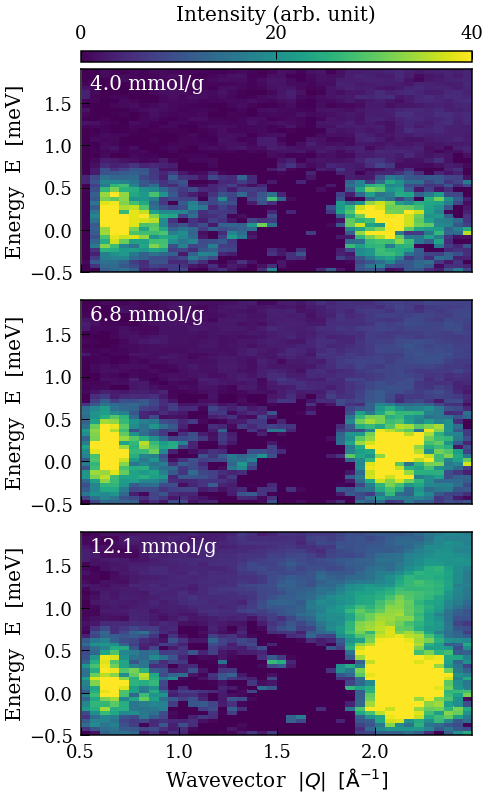

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mpl_colors
from copy import copy

plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    figsize=plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(3,1,figsize=(0.975*figsize[0],1.5*figsize[0]),constrained_layout=True, 
                         sharex=True, sharey=True)
    print(figsize)
    #ax.set_aspect('equal')

    pcm = []
    for i,cn in enumerate(n):
        pcm.append(ax[i].pcolormesh(Qmesh,Emesh,S[cn], edgecolor='None', rasterized=True, vmin=0,vmax=40))
        ax[i].annotate(f'{cn:.1f} mmol/g', xy=(0.025,0.9), xytext=(0.025,0.9),
                         xycoords=ax[i].transAxes, fontsize=10, color='w')
    

    ax[2].set_xlim([0.5,2.49])
    ax[2].set_ylim(-0.5,1.9)
    
    for cax in ax:
        cax.set_ylabel('Energy  E  [meV]')
    ax[2].set_xlabel(r'Wavevector  $\vert Q \vert \;\; [\mathrm{\AA}^{-1}]$')
    

    # Horizontal colorbar to ensure square figures are the same size 
    ticks=[0,20,40]
    loc = 'upper center'
    vshift = 0.09

    axins1 = inset_axes(ax[0],
                    width="100%",  # width = 50% of parent_bbox width
                    height="5.5%",  # height : 5%
                    loc=loc,
                    bbox_to_anchor=(0.0, vshift, 1, 1),
                   bbox_transform=ax[0].transAxes,
                   borderpad=0)
  
    cb = fig.colorbar(pcm[0], cax=axins1, ticks=ticks, orientation='horizontal')
    cb.set_label('Intensity (arb. unit)')
    
    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')

    plt.savefig('./plots/scattering.pdf',dpi=300) 